In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm  import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
%jupyter widget

UsageError: Line magic function `%jupyter` not found.


In [3]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# change M to 0 and B to 1
df['diagnosis'] = df['diagnosis'].map({'M':0, 'B':1})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
svc = SVC(kernel='linear', C=1.0, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 2:32], df['diagnosis'], random_state=0)
svc.fit(X_train, y_train)
print('Accuracy on training set: {:.2f}'.format(svc.score(X_train, y_train)))

Accuracy on training set: 0.97


In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy on training set: {:.2f}'.format(knn.score(X_train, y_train)))

Accuracy on training set: 0.94


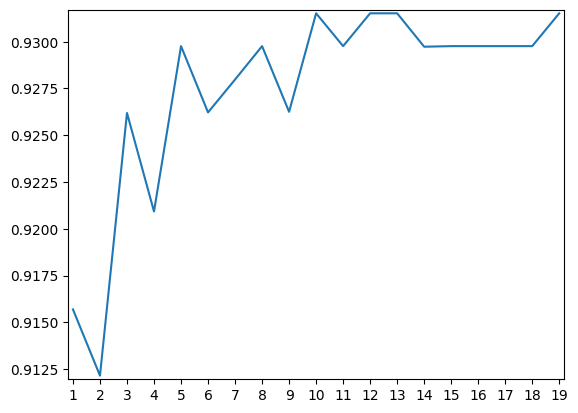

In [7]:
scores_knn = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores_knn.append(cross_val_score(knn, df.iloc[:, 2:32], df['diagnosis'], cv=10).mean())

plt.plot(range(1, 20), scores_knn)
plt.xticks(np.arange(1, 20, 1))
plt.margins(0.01)

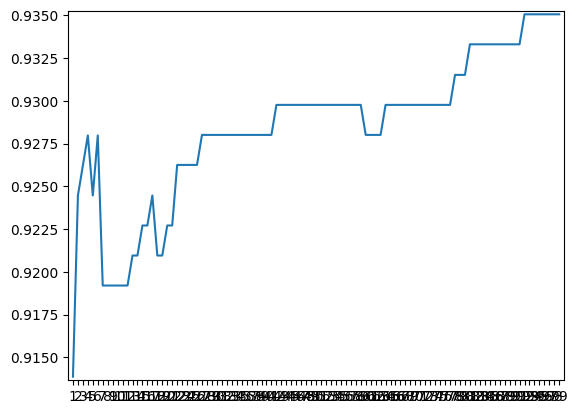

In [8]:
scores_svc = []
for i in range(1, 100):
    
    scores_svc.append(cross_val_score(SVC(C=i), df.iloc[:, 2:32], df['diagnosis'], cv=10).mean())

plt.plot(range(1, 100), scores_svc)
plt.xticks(np.arange(1, 100, 1))
plt.margins(0.01)

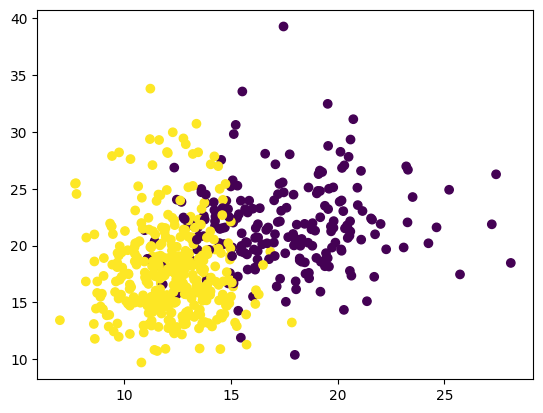

In [9]:
plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=df.iloc[:, 1])

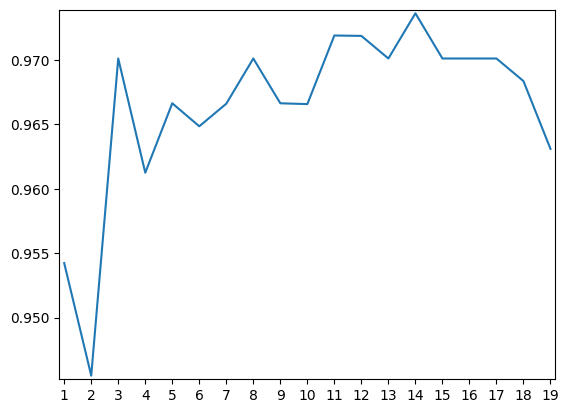

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(df.iloc[:, 2:32])
scores_knn_scaled = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores_knn_scaled.append(cross_val_score(knn, X_train_scaled, df['diagnosis'], cv=10).mean())

plt.plot(range(1, 20), scores_knn_scaled)
plt.xticks(np.arange(1, 20, 1))
plt.margins(0.01)


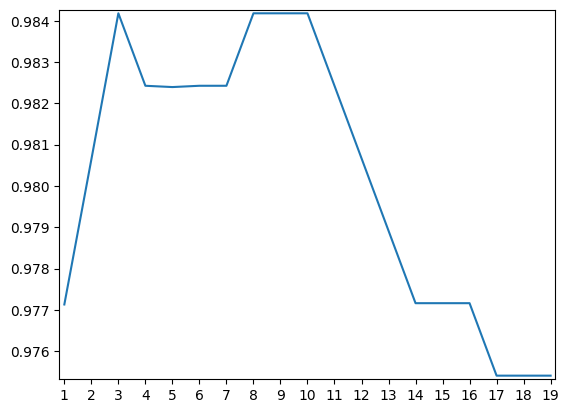

In [11]:
scores_svc_scaled = []
for i in range(1, 20):
    
    scores_svc_scaled.append(cross_val_score(SVC(C=i), X_train_scaled, df['diagnosis'], cv=10).mean())

plt.plot(range(1, 20), scores_svc_scaled)
plt.xticks(np.arange(1, 20, 1))
plt.margins(0.01)

In [12]:
from sklearn.model_selection import validation_curve
val_curve = validation_curve(KNeighborsClassifier(), df.iloc[:, 2:32], df['diagnosis'], param_name='n_neighbors', param_range=range(1, 20), cv=10)


[[0.94634046 0.94891036 0.94911595 0.94377056 0.94253701 0.94387336
  0.94140625 0.94551809 0.94777961 0.94377757]
 [0.89750693 0.86426593 0.90858726 0.95937211 0.95198523 0.93074792
  0.96029548 0.93813481 0.9076639  0.95488722]]


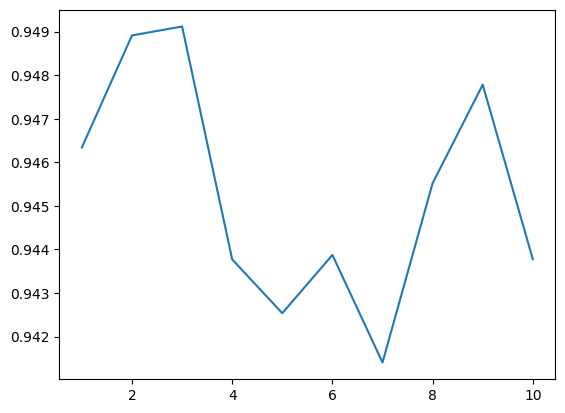

In [13]:
print(np.mean(val_curve, axis=1))
plt.plot(range(1, 11), np.mean(val_curve, axis=1)[0])

In [16]:
#final training
knn_scaled = KNeighborsClassifier(n_neighbors=14)#14 got the best score
knn_unscaled = KNeighborsClassifier(n_neighbors=14)#14 got the best score
svc_scaled = SVC(C=10.0)
svc_unscaled = SVC(C=10.0)
X_scaled = scaler.fit_transform(df.iloc[:, 2:32])
X_train, X_test, y_train, y_test=train_test_split(X_scaled, df['diagnosis'], random_state=0)
svc_scaled.fit(X_train, y_train)
knn_scaled.fit(X_train, y_train)
testing_scroes = []
print('Accuracy on SVC training set with scaled data: {:.2f}'.format(svc_scaled.score(X_train, y_train)))
print('Accuracy on SVC testing set with scaled data: {:.2f}'.format(svc_scaled.score(X_test, y_test)))
print('Accuracy on KNN training set with scaled data: {:.2f}'.format(knn_scaled.score(X_train, y_train)))
print('Accuracy on KNN testing set with scaled data: {:.2f}'.format(knn_scaled.score(X_test, y_test)))

testing_scroes.append(svc_scaled.score(X_test, y_test))
testing_scroes.append(knn_scaled.score(X_test, y_test))

X_train, X_test, y_train, y_test=train_test_split(df.iloc[:, 2:32], df['diagnosis'], random_state=0)
svc_unscaled.fit(X_train, y_train)
knn_unscaled.fit(X_train, y_train)
print("--------------------")
print('Accuracy on SVC training set with unscaled data: {:.2f}'.format(svc_unscaled.score(X_train, y_train)))
print('Accuracy on SVC testing set with unscaled data: {:.2f}'.format(svc_unscaled.score(X_test, y_test)))
print('Accuracy on KNN training set with unscaled data: {:.2f}'.format(knn_unscaled.score(X_train, y_train)))
print('Accuracy on KNN testing set with unscaled data: {:.2f}'.format(knn_unscaled.score(X_test, y_test)))
testing_scroes.append(svc_unscaled.score(X_test, y_test))
testing_scroes.append(knn_unscaled.score(X_test, y_test))


Accuracy on SVC training set with scaled data: 0.99
Accuracy on SVC testing set with scaled data: 0.98
Accuracy on KNN training set with scaled data: 0.97
Accuracy on KNN testing set with scaled data: 0.97
--------------------
Accuracy on SVC training set with unscaled data: 0.92
Accuracy on SVC testing set with unscaled data: 0.94
Accuracy on KNN training set with unscaled data: 0.93
Accuracy on KNN testing set with unscaled data: 0.96


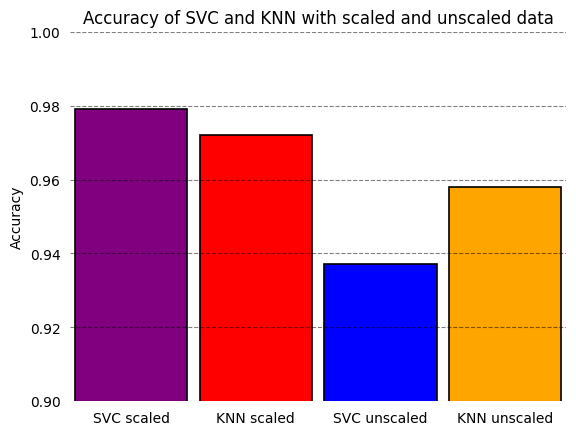

In [15]:
plt.bar(['SVC scaled', 'KNN scaled', 'SVC unscaled', 'KNN unscaled'], testing_scroes, edgecolor='black', linewidth=1.2, color=['purple', 'red', 'blue', 'orange'], width=0.9)
plt.ylim(0.9, 1.0)
plt.margins(0.01)
plt.ylabel('Accuracy')
plt.title('Accuracy of SVC and KNN with scaled and unscaled data')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='black')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)

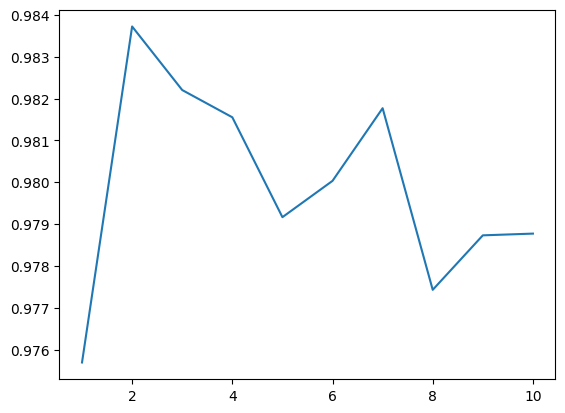

In [24]:
from sklearn.tree import DecisionTreeClassifier
val_curve_tree = validation_curve(DecisionTreeClassifier(), df.iloc[:, 2:32], df['diagnosis'], param_name='max_depth', param_range=range(1, 10), cv=10)
plt.plot(range(1, 11), np.mean(val_curve_tree, axis=1)[0])

In [30]:

tree_unscaled = DecisionTreeClassifier(max_depth=2)
X_train, X_test, y_train, y_test=train_test_split(df.iloc[:, 2:32], df['diagnosis'], random_state=0)
tree_unscaled.fit(X_train, y_train)
print('Accuracy on TREE training set with unscaled data: {:.2f}'.format(tree_unscaled.score(X_train, y_train)))
print('Accuracy on TREE testing set with unscaled data: {:.2f}'.format(tree_unscaled.score(X_test, y_test)))
testing_scroes.append(tree_unscaled.score(X_test, y_test))

Accuracy on TREE training set with unscaled data: 0.94
Accuracy on TREE testing set with unscaled data: 0.92


([<matplotlib.axis.YTick at 0x26152a2a010>,
 [Text(0, 0.9, '0.90'),
  Text(0, 0.91, '0.91'),
  Text(0, 0.92, '0.92'),
  Text(0, 0.93, '0.93'),
  Text(0, 0.9400000000000001, '0.94'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 0.9600000000000001, '0.96'),
  Text(0, 0.9700000000000001, '0.97'),
  Text(0, 0.9800000000000001, '0.98'),
  Text(0, 0.9900000000000001, '0.99'),
  Text(0, 1.0, '1.00')])

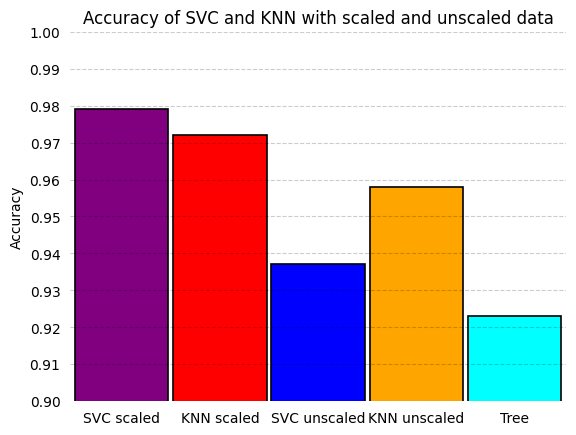

In [34]:
plt.bar(['SVC scaled', 'KNN scaled', 'SVC unscaled', 'KNN unscaled', 'Tree'], testing_scroes, edgecolor='black', linewidth=1.2, color=['purple', 'red', 'blue', 'orange', 'cyan'], width=0.95)
plt.ylim(0.9, 1.0)
plt.margins(0.01)
plt.ylabel('Accuracy')
plt.title('Accuracy of SVC and KNN with scaled and unscaled data')
plt.grid(axis='y', linestyle='--', alpha=0.2, color='black')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)
plt.yticks(np.arange(0.9, 1.01, 0.01))